In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import warnings # supress warnings
warnings.filterwarnings('ignore')

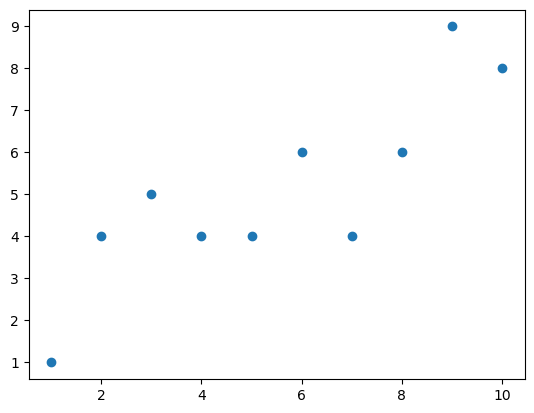

In [3]:
#create x,y arrays
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([1,4,5,4,4,6,4,6,9,8])


#draw scatter plot
plt.scatter(x,y)

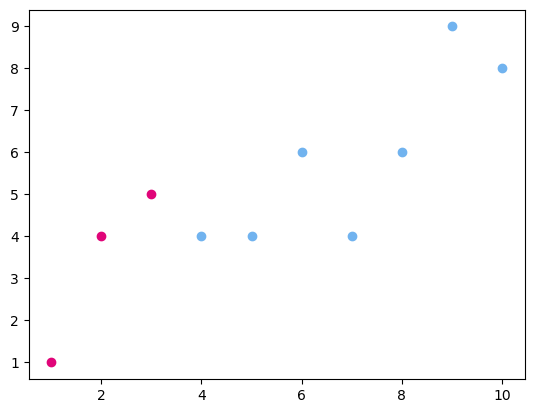

In [5]:
# Train Test split 
X_train=x[0:3]
X_test=x[3:10]

Y_train=y[0:3]
Y_test=y[3:10]

#plot scatter plots of train and test data
plt.scatter(X_train,Y_train, color='#e00579')
plt.scatter(X_test,Y_test, color='#71b3ef')

#### Question 6 a.

train score: 0.9230769230769231
test score: -16.705619412515958


'\na negative R squared means that the model is predicting worse than the mean of the target values (y¯).\nIn other words, the mean squared error (MSE) of the model is higher than the MSE of a dummy estimator \nusing the mean of the target values as the prediction.\n'

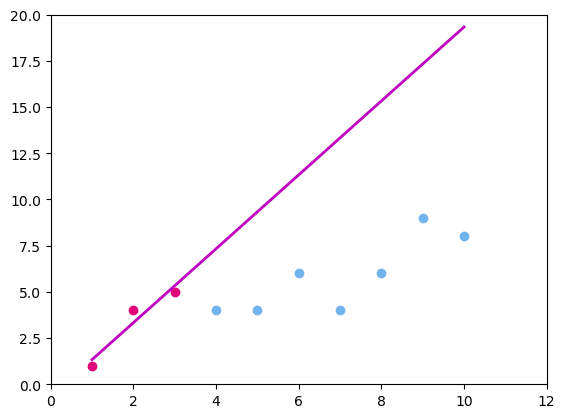

In [6]:
#train model with training data
model_train = LinearRegression()
model_train.fit(X_train,Y_train)
y_pred = model_train.predict(x)

#plot scatter plots of train and test data
plt.scatter(X_train,Y_train, color='#e00579')
plt.scatter(X_test,Y_test, color='#71b3ef')

#plot regression_line 
plt.plot(x,y_pred, color='m', linewidth=2)

#adjust x,y axis limits
plt.xlim(0, 12)
plt.ylim(0, 20)

#model scores 
train_score=model_train.score(X_train, Y_train)
print("train score:", train_score)

test_score=model_train.score(X_test, Y_test)
print("test score:",test_score)

"""
a negative R squared means that the model is predicting worse than the mean of the target values (y¯).
In other words, the mean squared error (MSE) of the model is higher than the MSE of a dummy estimator 
using the mean of the target values as the prediction.
"""

#### Question 6 b.
There is evidence of overfitting, so we will add regularization.

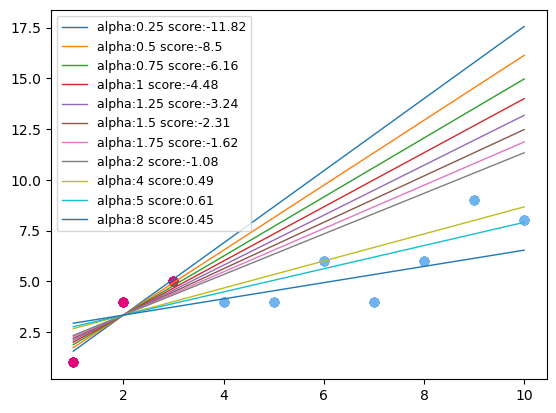

In [11]:
alphas = [ 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 4, 5, 8]
train_scores=[]
test_scores=[]

for i in alphas:  

    model_ridge = Ridge(alpha = i)
    model_ridge.fit(X_train, Y_train)
    
    # predicting y with ridge model
    Y_ridge_pred = model_ridge.predict(x)
    
    #plot scatter plots of train and test data
    plt.scatter(X_train,Y_train, color='#e00579')
    plt.scatter(X_test,Y_test, color='#71b3ef')
    
    #model scores     
    train_score=model_ridge.score(X_train, Y_train)
    test_score=model_ridge.score(X_test, Y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # plot ridge regression line
    plt.plot(x,Y_ridge_pred, linewidth=1, label='alpha:'+str(i)+' score:'+str(round(test_score, 2)))
    
plt.legend(fontsize=9, loc='upper left')

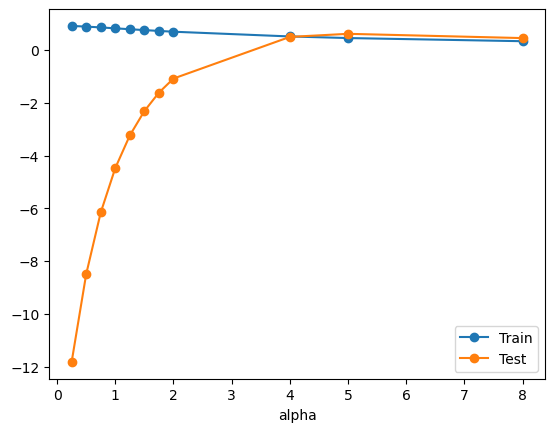

In [13]:
#plot scores for training data and test data acorss alpha values

plt.plot(alphas, train_scores, '-o', label='Train')
plt.plot(alphas, test_scores, '-o', label='Test')
plt.xlabel("alpha")
plt.legend()

#### Question 6c.
The best result is when alpha = 4, so we will use that.

train score: 0.512820512820513
test score: 0.4948914431673047


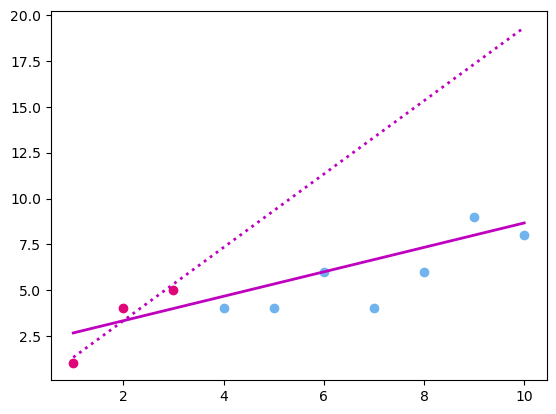

In [12]:
# training ridge regression model with with alpha=100
model_ridge = Ridge(alpha = 4)
model_ridge.fit(X_train, Y_train)

# predicting y with ridge model
y_ridge_pred = model_ridge.predict(x)
  
#plot scatter plots of train and test data
plt.scatter(X_train,Y_train, color='#e00579')
plt.scatter(X_test,Y_test, color='#71b3ef')

# plot simple regression line
plt.plot(x,y_pred, color='m', linestyle='dotted', linewidth=2)

# plot ridge regression line
plt.plot(x,y_ridge_pred, color='m', linewidth=2)

#model scores 
train_score=model_ridge.score(X_train, Y_train)
print("train score:", train_score)

test_score=model_ridge.score(X_test, Y_test)
print("test score:",test_score)